# **Load Data & Import Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Bootcamp/PROJECT/Heart Failure Prediction/heart.csv')

# **Exploratory Data Analysis**

**Preliminary Look at the Data**

In [ ]:
data.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
data.tail(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
data.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
121,52,F,NAP,125,272,0,Normal,139,N,0.0,Up,0
280,60,M,NAP,120,246,0,LVH,135,N,0.0,Up,0
44,43,M,ASY,120,175,0,Normal,120,Y,1.0,Flat,1
645,57,M,NAP,128,229,0,LVH,150,N,0.4,Flat,1
180,52,M,ASY,130,225,0,Normal,120,Y,2.0,Flat,1


- No obvious defect on the data (column name and its entries), all looks good

**General Info**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
data.duplicated().sum()

0

- There is no missing value and duplicated data in this dataset

# **Deep-Dive Understanding**

**Statistical Summary**

In [ ]:
# Classification into two groups based on data type
numerical = ['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak','HeartDisease']

categorical = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [ ]:
data[numerical].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


- `Age`,`RestingBP`,and `MaxHR` indicating a symmetrical distribution.
- `FastingBS` and `HeartDisease` is a boolean since the value only 0 and 1.
- `Cholesterol` have 50% value > mean, indicating a negatively skew.
- `Oldpeak` have mean > 50% value, indicating a positively skew
- There are negative value in `Oldpeak`, since the value negative is possible, we can ignore it.

In [ ]:
data[categorical].describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
# Showing precision values
for col in categorical:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Sex column
M    725
F    193
Name: Sex, dtype: int64 

Value counts of ChestPainType column
ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64 

Value counts of RestingECG column
Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64 

Value counts of ExerciseAngina column
N    547
Y    371
Name: ExerciseAngina, dtype: int64 

Value counts of ST_Slope column
Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64 



- There is no abnormal value in categorical columns.

# **Univariate Analysis**

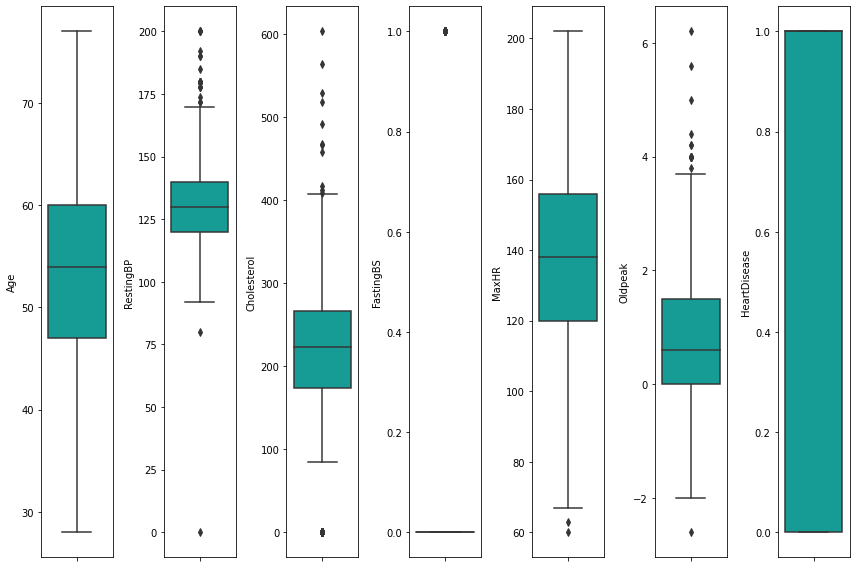

In [ ]:
# Boxplot to detect outliers

plt.figure(figsize=(12,8))

features = numerical
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=data[features[i]], color='#00B2A9')
    plt.tight_layout()

- Since `RestingBP`,`MaxHR` indicating a symmetrical distribution, we can ignore the outliers.
- Outliers at `Cholesterol` and `Oldpeak` need to check further.

In [ ]:
# Outliers at Cholesterol Column
Q1_cholesterol = np.percentile(data['Cholesterol'], 25, interpolation = 'midpoint') 
Q3_cholesterol = np.percentile(data['Cholesterol'], 75, interpolation = 'midpoint') 
IQR_cholesterol = Q3_cholesterol - Q1_cholesterol
low_lim_cholesterol = Q1_cholesterol - 1.5 * IQR_cholesterol
up_lim_cholesterol = Q3_cholesterol + 1.5 * IQR_cholesterol

In [ ]:
outlier_avg = []
for x in data['Cholesterol']:
    if ((x> up_lim_cholesterol) or (x<low_lim_cholesterol)):
         outlier_avg.append(x)
print('There are', len(outlier_avg), 'outliers in Cholesterol column and it is', round(len(outlier_avg)/len(data)*100,2),'% of the total data')

There are 183 outliers in Cholesterol column and it is 19.93 % of the total data


In [ ]:
# Outliers at Oldpeak Column
Q1_oldpeak = np.percentile(data['Oldpeak'], 25, interpolation = 'midpoint') 
Q3_oldpeak = np.percentile(data['Oldpeak'], 75, interpolation = 'midpoint') 
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak
low_lim_oldpeak = Q1_oldpeak - 1.5 * IQR_oldpeak
up_lim_oldpeak = Q3_oldpeak + 1.5 * IQR_oldpeak

In [ ]:
outlier_avg = []
for x in data['Oldpeak']:
    if ((x> up_lim_oldpeak) or (x<low_lim_oldpeak)):
         outlier_avg.append(x)
print('There are', len(outlier_avg), 'outliers in Oldpeak column and it is', round(len(outlier_avg)/len(data)*100,2),'% of the total data')

There are 16 outliers in Oldpeak column and it is 1.74 % of the total data


Outliers in `Cholesterol` is 19.93% (more than 5%), so the clip method will be used. Meanwhile oultiers in `Oldpeak` is 1.74% (less than 5%). We can drop it.

In [ ]:
# Handling outliers at Cholesterol column
data['Cholesterol'] = data['Cholesterol'].clip(lower=50)

In [ ]:
# Handling outliers at Oldpeak column
print(f'number of rows before filtering outliers are {len(data)} rows')

filtered_entries = np.array([True] * len(data))
for col in ['Oldpeak']:
    filtered_entries = ((data[col] >= low_lim_oldpeak) & (data[col] <= up_lim_oldpeak)) & filtered_entries
    
data_filtered= data[filtered_entries]

print(f'number of rows after filtering outliers are {len(data_filtered)} rows')

number of rows before filtering outliers are 918 rows
number of rows after filtering outliers are 902 rows


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

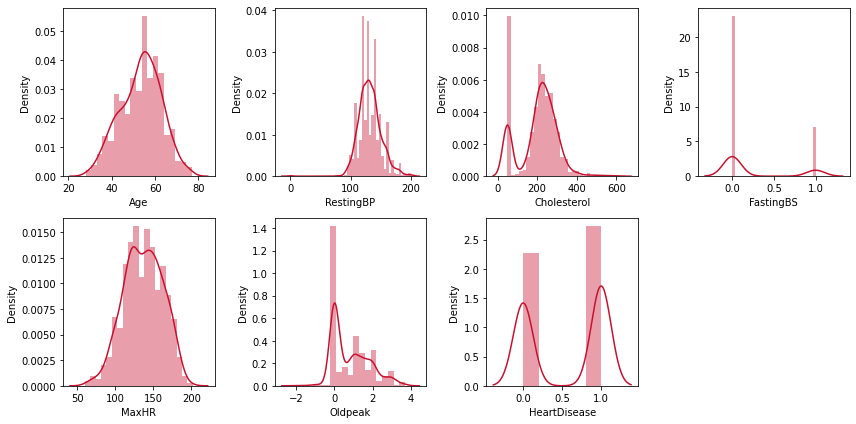

In [ ]:
#KDE (Kernel Density Estimation) plot

plt.figure(figsize=(12,6))

features = numerical
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=data_filtered[features[i]], color='#C8102E')
    plt.xlabel(features[i])
    plt.tight_layout()

- `Age`, `RestingBP`, and `MaxHR` have a symmetrical distribution.
- `Cholesterol` have negatively skew.
- `Oldpeak` have positively skew.

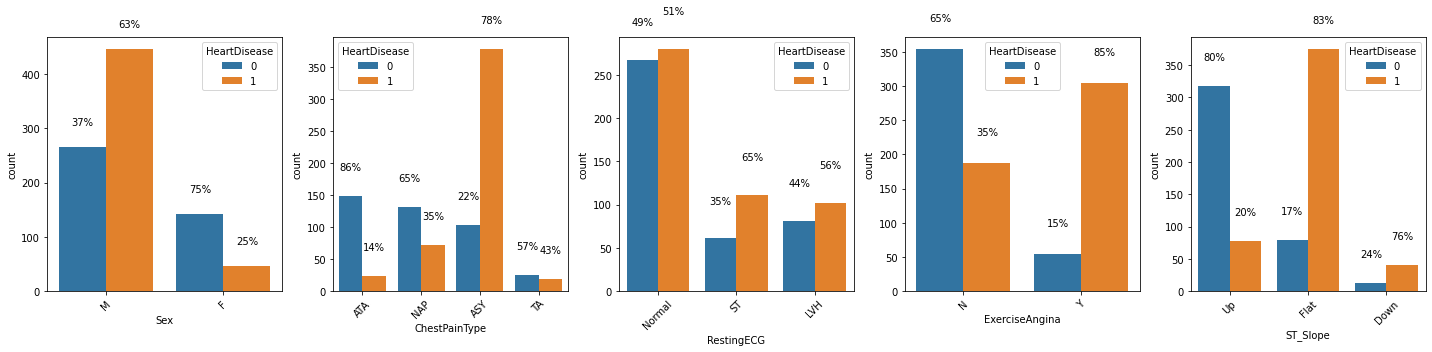

In [ ]:
# Barplot

features = categorical
plt.figure(figsize=(20,5))
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    ax = sns.countplot(data=data_filtered,
            x=features[i],
            hue='HeartDisease')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")
    plt.xticks(rotation=45)
    plt.tight_layout()

- Male tend have heart disease than female. Need to check other aspects.
- Chest pain type Asymptomatic (ASY) tend have heart disease.
- People with normal resting electrocardiogram (ECG) results precisely tend have heart disease. Need to check other such as lifestyle or food.
- People who did exercise angina majority have heart disease.
- People with flat ST Slope tend have heart disease.

# **Multivariate (Bivariate) Analysis**

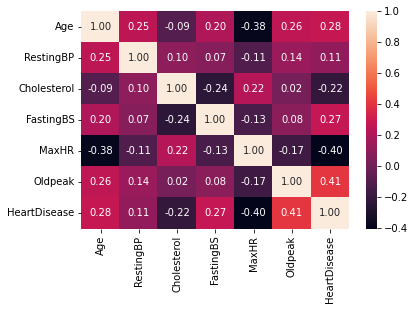

In [ ]:
# Heat Map for knowing the correlation data

correlation = data_filtered.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

- There is no redundant features in this dataset. Therefore, all columns is used.
- `Oldpeak` and `MaxHR` have highest correlation with `HeartDisease`. The differences is, `Oldpeak` in positive way(0.41), meanwhile `MaxHR` in negative way(-0,40) to `HeartDisease`.

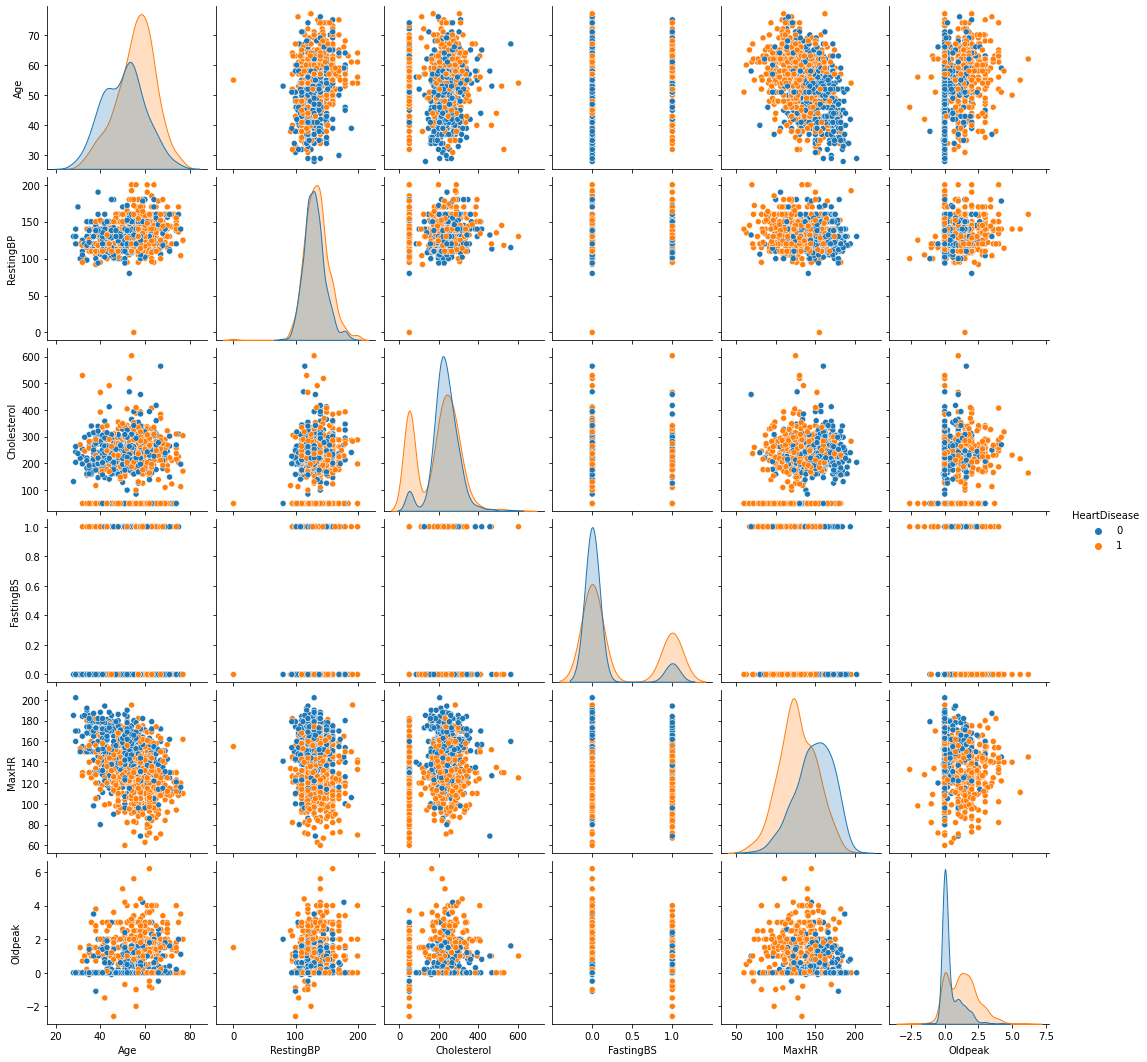

In [ ]:
sns.pairplot(data, hue='HeartDisease')

- People with MaxHR (Heart Rate) below than 160 tend have heart disease and risky to have heart failure.
- Majority people with age above 40 years old have heart disease.
- People with Oldpeak above than 2 tend have heart disease.

In [ ]:
# Handling categorical value
string_categorical = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

for feature in string_categorical:
  if feature =='Sex':
    data_filtered[feature] = data_filtered[feature].apply(lambda x: 0 if x=='M' else 1).astype(int)
  if feature =='ChestPainType':
    data_filtered[feature] = data_filtered[feature].apply(lambda x: 0 if x=='ASY' else (1 if x=='NAP' else (2 if x=='ATA' else 3))).astype(int)
  if feature =='RestingECG':
    data_filtered[feature] = data_filtered[feature].apply(lambda x: 0 if x=='Normal' else (1 if x=='LVH' else 2)).astype(int)
  if feature =='ExerciseAngina':
    data_filtered[feature] = data_filtered[feature].apply(lambda x: 0 if x=='N' else 1).astype(int)
  if feature =='ST_Slope':
    data_filtered[feature] = data_filtered[feature].apply(lambda x: 0 if x=='Flat' else (1 if x=='Up' else 2)).astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
dataset = pd.get_dummies(data_filtered)
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,2,140,289,0,0,172,0,0.0,1,0
1,49,1,1,160,180,0,0,156,0,1.0,0,1
2,37,0,2,130,283,0,2,98,0,0.0,1,0
3,48,1,0,138,214,0,0,108,1,1.5,0,1
4,54,0,1,150,195,0,0,122,0,0.0,1,0


In [ ]:
# Standard scaller for predictor
var = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol',
       'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina',
       'Oldpeak', 'ST_Slope']

In [ ]:
scaler = StandardScaler()
dataset[var] = scaler.fit_transform(dataset[var])
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.425353,-0.516579,1.341551,0.424362,0.877522,-0.552589,-0.739462,1.377618,-0.814989,-0.863308,0.732478,0
1,-0.471121,1.935812,0.264010,1.514577,-0.295538,-0.552589,-0.739462,0.750254,-0.814989,0.172478,-0.919260,1
2,-1.743431,-0.516579,1.341551,-0.120746,0.812950,-0.552589,1.791828,-1.523939,-0.814989,-0.863308,0.732478,0
3,-0.577147,1.935812,-0.813532,0.315341,0.070371,-0.552589,-0.739462,-1.131837,1.227011,0.690371,-0.919260,1
4,0.059008,-0.516579,0.264010,0.969470,-0.134108,-0.552589,-0.739462,-0.582894,-0.814989,-0.863308,0.732478,0


# **Modelling Machine Learning**

In [ ]:
# Split train test, proportion 80% training 20% testing

feature = dataset.drop(columns='HeartDisease')
target = dataset[['HeartDisease']]

feature_dataset_train, feature_dataset_test, target_dataset_train, target_dataset_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [ ]:
# Logistic Regression
logreg = LogisticRegression(random_state=42)
logreg.fit(feature_dataset_train,target_dataset_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [ ]:
target_train_pred = logreg.predict(feature_dataset_train)
target_test_pred = logreg.predict(feature_dataset_test)

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       320
           1       0.87      0.88      0.88       401

    accuracy                           0.86       721
   macro avg       0.86      0.86      0.86       721
weighted avg       0.86      0.86      0.86       721



Text(33.0, 0.5, 'Reality')

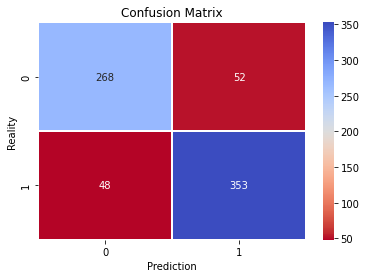

In [ ]:
# Model training check

cnf_matrix = confusion_matrix(target_dataset_train, target_train_pred)
print(classification_report(target_dataset_train, target_train_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Reality')

In [ ]:
print("Accuracy Training data : ",metrics.accuracy_score(target_dataset_train,target_train_pred))
print("Recall Training data : ",metrics.recall_score(target_dataset_train,target_train_pred))
print("Precision Training data : ",metrics.precision_score(target_dataset_train,target_train_pred))
print("F-1 Training data : ",metrics.f1_score(target_dataset_train,target_train_pred))

Accuracy Training data :  0.8613037447988904
Recall Training data :  0.8802992518703242
Precision Training data :  0.8716049382716049
F-1 Training data :  0.8759305210918115


- True positive from the confusion matrix of the training data has the biggest value
- This model accurately predicts 86% of the dataset

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        89
           1       0.84      0.88      0.86        92

    accuracy                           0.85       181
   macro avg       0.85      0.85      0.85       181
weighted avg       0.85      0.85      0.85       181



Text(33.0, 0.5, 'Reality')

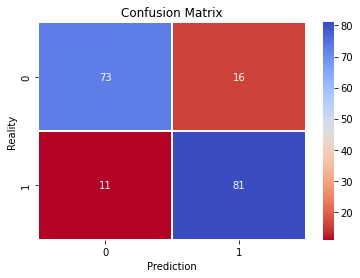

In [ ]:
# Model test check

cnf_matrix = confusion_matrix(target_dataset_test, target_test_pred)
print(classification_report(target_dataset_test, target_test_pred))
sns.heatmap(cnf_matrix,cmap='coolwarm_r',annot=True,linewidth=0.5,fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Prediction')
plt.ylabel('Reality')

In [ ]:
print("Accuracy Test data : ",metrics.accuracy_score(target_dataset_test,target_test_pred))
print("Recall Test data : ",metrics.recall_score(target_dataset_test,target_test_pred))
print("Precision Test data : ",metrics.precision_score(target_dataset_test,target_test_pred))
print("F-1 Test data : ",metrics.f1_score(target_dataset_test,target_test_pred))

Accuracy Test data :  0.850828729281768
Recall Test data :  0.8804347826086957
Precision Test data :  0.8350515463917526
F-1 Test data :  0.8571428571428571


- True positive from the confusion matrix of the test data has the biggest value
- The accuracy test data for this model reach 85%. Not far from the training data.

In [ ]:
dataset.shape

(902, 12)